### El tratamiento de las variables categoricas

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [12]:
df = pd.read_csv('data\Ecom Expense.csv')

<>:1: SyntaxWarning: invalid escape sequence '\E'
<>:1: SyntaxWarning: invalid escape sequence '\E'
C:\Users\lino_\AppData\Local\Temp\ipykernel_13352\604094798.py:1: SyntaxWarning: invalid escape sequence '\E'
  df = pd.read_csv('data\Ecom Expense.csv')


In [13]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [14]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender')
dummy_city = pd.get_dummies(df['City Tier'], prefix='City')

In [15]:
dummy_gender.head()

,Gender_Female,Gender_Male
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False


In [16]:
dummy_city.head()

,City_Tier 1,City_Tier 2,City_Tier 3
0,True,False,False
1,False,True,False
2,False,True,False
3,True,False,False
4,False,True,False


In [17]:
column_names = df.columns.values.tolist()
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend']

In [18]:
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new
column_names

['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male']

In [22]:
df_new = df_new[column_names].join(dummy_city)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False


In [42]:
feature_cols = ["Monthly Income", "Transaction Time",
                "Gender_Female", "Gender_Male",
                "City_Tier 1", "City_Tier 2", "City_Tier 3","Record"]
df_new.columns.values.tolist()


['Transaction ID',
 'Age ',
 ' Items ',
 'Monthly Income',
 'Transaction Time',
 'Record',
 'Gender',
 'City Tier',
 'Total Spend',
 'Gender_Female',
 'Gender_Male',
 'City_Tier 1',
 'City_Tier 2',
 'City_Tier 3']

In [43]:
X = df_new[feature_cols]
y = df_new['Total Spend']

In [44]:
lm = LinearRegression()
lm.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [45]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030136725
[ 1.47538980e-01  1.54946125e-01 -1.31025013e+02  1.31025013e+02
  7.67643260e+01  5.51389743e+01 -1.31903300e+02  7.72233446e+02]


In [46]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', np.float64(0.14753898049205744)),
 ('Transaction Time', np.float64(0.15494612549589615)),
 ('Gender_Female', np.float64(-131.0250132555454)),
 ('Gender_Male', np.float64(131.0250132555453)),
 ('City_Tier 1', np.float64(76.76432601049501)),
 ('City_Tier 2', np.float64(55.13897430923254)),
 ('City_Tier 3', np.float64(-131.90330031972766)),
 ('Record', np.float64(772.2334457445633))]

In [47]:
lm.score(X, y)

0.9179923586131016

El modelo puede ser escrito como: 
* Total Spend = -79.41713030136725 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 +    'Gender_Female'*-131.0250132555454 + 'Gender_Male'*131.0250132555453 + 'City_Tier 1'*76.76432601049501 + 'City_Tier 2'*55.13897430923254 + 'City_Tier 3'*-131.90330031972766 + 'Record'*772.2334457445633

    * Si es hombre y vive en CT1: Total Spend = 128.37220896467306 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 + 'Record'*772.2334457445633

    * Si es hombre y vive en CT2: Total Spend = 106.74685726341059 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 + 'Record'*772.2334457445633

    * Si es hombre y vive en CT3: Total Spend = -80.29541736554961 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 + 'Record'*772.2334457445633

    * Si es mujer y vive en CT1: Total Spend = -79.41713030136725 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555453 + 76.76432601049501 + 'Record'*772.2334457445633

    * Si es mujer y vive en CT2: Total Spend = -79.41713030136725 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555453 + 55.13897430923254 + 'Record'*772.2334457445633

    * Si es mujer y vive en CT3: Total Spend = -79.41713030136725 + 'Monthly Income'*0.14753898049205744 + 'Transaction Time' * 0.15494612549589615 - 131.0250132555453 -131.90330031972766 + 'Record'*772.2334457445633

In [48]:
df_new["Prediction"] = -79.41713030136725 + df_new["Monthly Income"]*0.14753898049205744 + df_new["Transaction Time"] * 0.154946125495896 + df_new["Gender_Female"]*-131.0250132555454 + df_new["Gender_Male"]*131.0250132555453 + df_new["City_Tier 1"]*76.76432601049501 + df_new["City_Tier 2"]*55.13897430923254 + df_new["City_Tier 3"]*-131.90330031972766 + df_new["Record"]*772.2334457445633


In [49]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,Prediction
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,True,False,True,False,False,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,True,False,False,True,False,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,False,True,False,True,False,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,True,False,True,False,False,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,True,False,False,True,False,3581.980335


In [50]:
SSD = np.sum((df_new['Prediction'] - df_new['Total Spend']) ** 2)

In [51]:
SSD

np.float64(1517733985.3408165)

In [ ]:
RSE = np.sqrt(SSD/(len(df_new) - len(feature_cols) - 1)) ## Variacion estandar 

In [53]:
RSE

np.float64(803.1318809818166)

In [54]:
sales_mean = np.mean(df_new['Total Spend'])

In [55]:
sales_mean

np.float64(6163.176415976715)

In [56]:
error = RSE/sales_mean

In [58]:
error

np.float64(0.1303113568029416)

In [61]:
-79.41713030136725  + 131.0250132555453 + -131.90330031972766 


-80.29541736554961

### Eliminar variables dummy redundantes

In [64]:
dummy_gender = pd.get_dummies(df['Gender'], prefix='Gender').iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,False
1,False
2,True
3,False
4,False


In [65]:
dummy_city_tier = pd.get_dummies(df['City Tier'], prefix='City').iloc[:,1:]

In [66]:
dummy_city_tier

,City_Tier 2,City_Tier 3
0,False,False
1,True,False
2,True,False
3,False,False
4,True,False
...,...,...
2357,True,False
2358,True,False
2359,False,True
2360,False,False


In [68]:
column_names = df.columns.values.tolist()
df_new = df[column_names].join(dummy_gender)
column_names = df_new.columns.values.tolist()
df_new = df_new[column_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,False,False,False
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,False,True,False
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,True,True,False
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,False,False,False
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,False,True,False


In [71]:
feature_cols = ["Monthly Income", "Transaction Time","Gender_Male","City_Tier 2","City_Tier 3","Record"]
X = df_new[feature_cols]
y = df_new['Total Spend']
lm = LinearRegression()
lm.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [72]:
print(lm.intercept_)

-133.67781754642238


In [74]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', np.float64(0.14753898049205744)),
 ('Transaction Time', np.float64(0.15494612549589615)),
 ('Gender_Male', np.float64(262.0500265110957)),
 ('City_Tier 2', np.float64(-21.62535170126293)),
 ('City_Tier 3', np.float64(-208.66762633022313)),
 ('Record', np.float64(772.2334457445637))]

In [75]:
lm.score(X, y)

0.9179923586131016

Coeficiente con todas las variables en el modelo: 

* ('Monthly Income', np.float64(0.14753898049205744)),
* ('Transaction Time', np.float64(0.15494612549589615)),
* ('Gender_Female', np.float64(-131.0250132555454)),
* ('Gender_Male', np.float64(131.0250132555453)),
* ('City_Tier 1', np.float64(76.76432601049501)),
* ('City_Tier 2', np.float64(55.13897430923254)),
* ('City_Tier 3', np.float64(-131.90330031972766)),
* ('Record', np.float64(772.2334457445633)

Coeficientes tras enmascarar las variables dummy pertinentes

* ('Monthly Income', np.float64(0.14753898049205744)),
* ('Transaction Time', np.float64(0.15494612549589615)),
* ('Gender_Male', np.float64(262.0500265110957)),
* ('City_Tier 2', np.float64(-21.62535170126293)),
* ('City_Tier 3', np.float64(-208.66762633022313)),
* ('Record', np.float64(772.2334457445637)


Los cambios se reflejan en: 
* Gender_male: antes 131.02, despues 262.050 = (131.02 - (-131.02))
* Gender_female: -> 131.02, despues -> 0
* CT1: antes -> 76.76, despues -> 0
* CT2: antes -> 55.13, despues -> 55.1389 = (55.13 - 76.76)
* CT3: antes -> -131.9033, despues -> -208.6676 = (-131.9033 - 76.76)

### Transformacion de variables para conseguir una relacion no lineal 

In [76]:
import pandas as pd

In [81]:
data_auto = pd.read_csv('data/auto/auto-mpg.csv')
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [82]:
data_auto.shape

(406, 9)

In [83]:
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline
data_auto['mpg'] = data_auto['mpg'].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()

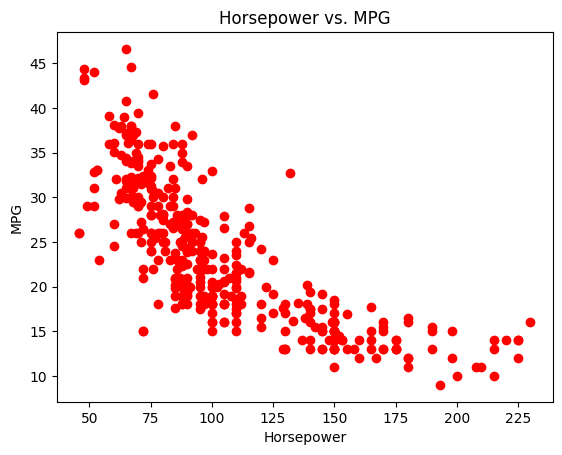

In [85]:
plt.plot(data_auto["horsepower"], data_auto["mpg"],'ro')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.title('Horsepower vs. MPG')
plt.show() 

### Modelo de regresion lineal 
* mpg = a + b*horsepower

In [100]:
x = data_auto[['horsepower']].fillna(data_auto['horsepower'].mean())
y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

In [102]:
lm = LinearRegression()
lm.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [105]:
type(x)

pandas.core.frame.DataFrame

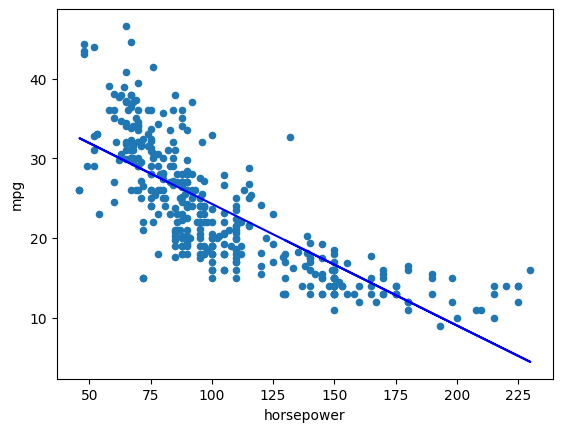

In [106]:
%matplotlib inline
data_auto.plot(kind='scatter', x='horsepower', y='mpg')
plt.plot(x, lm.predict(x), color='blue')

In [108]:
lm.score(x, y)

0.5746533406450252

In [110]:
SSD = sum((y - lm.predict(x)) ** 2)
RSE = np.sqrt(SSD / (len(y) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE,y_mean, error

(10315.751960060918,
 np.float64(5.046879480825511),
 np.float64(23.514572864321607),
 np.float64(0.21462773361633472))

### Modelo de regresion cuadratico

mpg = a + b*horsepower^2

In [111]:
x_data = x**2

In [112]:
lm = LinearRegression()
lm.fit(x_data, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [114]:
lm.score(x_data, y)

0.4849887034823205

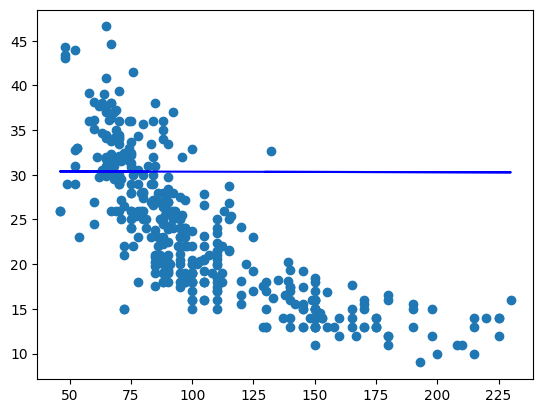

In [117]:
SSD = sum((y - lm.predict(x_data)) ** 2)
RSE = np.sqrt(SSD / (len(y) - 1))
y_mean = np.mean(y)
error = RSE / y_mean
SSD, RSE,y_mean, error

(12490.350340501926,
 np.float64(5.553410772769817),
 np.float64(23.514572864321607),
 np.float64(0.23616889852998113))

### Modelo de regresion lineal y cuadratico
* mpg = a + b*horsepower + c*horsepower^2

In [118]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [119]:
poly = PolynomialFeatures(degree=2) # Grado del polinomio

In [120]:
x_data = poly.fit_transform(x)

In [121]:
lm = linear_model.LinearRegression()
lm.fit(x_data, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [122]:
lm.score(x_data, y)

0.6439066584257469

In [123]:
lm.intercept_

np.float64(55.026192447081144)

In [124]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026192447081144 -0.43404318*ho + 0.0.00112615*hp^2

In [136]:
for d in range(2,6): 
    poly = PolynomialFeatures(degree=d) # Grado del polinomio
    x_data = poly.fit_transform(x)
    lm = linear_model.LinearRegression()
    lm.fit(x_data, y)
    print(f'Degree: {d}, R^2: {lm.score(x_data, y)}')
    print(lm.score(x_data, y))
    print(lm.intercept_)
    regression_validation(x_data, y, lm.predict(x_data))

Degree: 2, R^2: 0.6439066584257469
0.6439066584257469
55.026192447081144
SSD: 8636.180643524502 RSE: 4.61778115803654 y_mean: 23.514572864321607Error: 19.6379546619069% 
Degree: 3, R^2: 0.6444678885560744
0.6444678885560744
58.448774111485776
SSD: 8622.56936742855 RSE: 4.614140736300908 y_mean: 23.514572864321607Error: 19.622473106036686% 
Degree: 4, R^2: 0.6467674189704502
0.6467674189704502
40.09664386277739
SSD: 8566.799832491351 RSE: 4.599194731579757 y_mean: 23.514572864321607Error: 19.558912501268786% 
Degree: 5, R^2: 0.6547512491363356
0.6547512491363356
-40.694029037178964
SSD: 8373.171388794579 RSE: 4.546921734127706 y_mean: 23.514572864321607Error: 19.336612067602974% 


In [135]:
def regression_validation(x_data, y, y_predict):
    SSD = sum((y - y_predict) ** 2)
    RSE = np.sqrt(SSD / (len(x_data) - 1))
    y_mean = np.mean(y)
    error = RSE / y_mean
    print("SSD: " + str(SSD) + " RSE: " + str(RSE) + " y_mean: " + str(y_mean) + "Error: " + str(error*100) + "% ")

### El problema de los outliers 

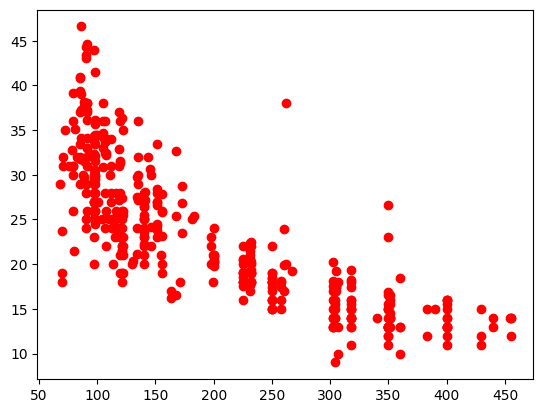

In [139]:
plt.plot(data_auto["displacement"], data_auto["mpg"],'ro')

In [142]:
x = data_auto[['displacement']].fillna(data_auto['displacement'].mean())
y = data_auto['mpg'].fillna(data_auto['mpg'].mean())

lm = LinearRegression()
lm.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [144]:
lm.score(x, y)

0.6261049762826918

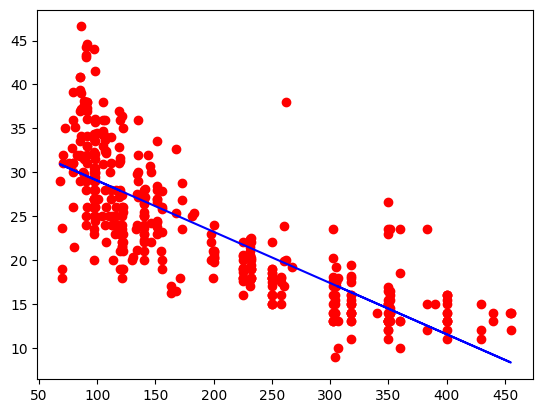

In [145]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color='blue')

In [150]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"]>35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [151]:
data_auto[(data_auto["displacement"]>300) & (data_auto["mpg"]>20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls


In [153]:
data_auto_clean = data_auto.drop([395,258,305,372])

In [154]:
x = data_auto_clean[['displacement']].fillna(data_auto_clean['displacement'].mean())
y = data_auto_clean['mpg'].fillna(data_auto_clean['mpg'].mean())

lm = LinearRegression()
lm.fit(x, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [155]:
lm.score(x, y)

0.6466514317531822

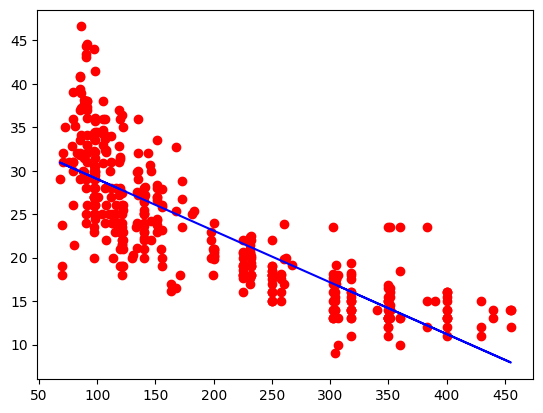

In [156]:
%matplotlib inline
plt.plot(x,y,"ro")
plt.plot(x, lm.predict(x), color='blue')